In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gandharvi","key":"ba0c2e3f518670021c106453179b5079"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:23<00:00, 105MB/s] 
100% 2.04G/2.04G [00:23<00:00, 92.9MB/s]


In [ ]:
!unzip plantvillage-dataset.zip -d ./plant-village-dataset

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
IMAGE_SIZE = (128,128)
BATCH_SIZE = 16
NUM_CLASSES = 38
VALIDATION_SPLIT = 0.2

In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=VALIDATION_SPLIT
)

train_generator = datagen.flow_from_directory(
    '/content/plant-village-dataset/plantvillage dataset/color',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/plant-village-dataset/plantvillage dataset/color',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [11]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

NUM_CLASSES = 38

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

model.build(input_shape=(None, 128, 128, 3))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      10,486,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,763,750 (48.69 MB)

 Trainable params: 10,505,766 (40.08 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 293s 105ms/step - accuracy: 0.6385 - loss: 1.3639 - val_accuracy: 0.8707 - val_loss: 0.4048
Epoch 2/5
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 280s 103ms/step - accuracy: 0.8220 - loss: 0.5918 - val_accuracy: 0.8955 - val_loss: 0.3297
Epoch 3/5
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 312s 115ms/step - accuracy: 0.8419 - loss: 0.5069 - val_accuracy: 0.9126 - val_loss: 0.2722
Epoch 4/5
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 282s 104ms/step - accuracy: 0.8589 - loss: 0.4461 - val_accuracy: 0.9096 - val_loss: 0.2852
Epoch 5/5
2716/2716 ━━━━━━━━━━━━━━━━━━━━ 288s 106ms/step - accuracy: 0.8631 - loss: 0.4394 - val_accuracy: 0.9180 - val_loss: 0.2501


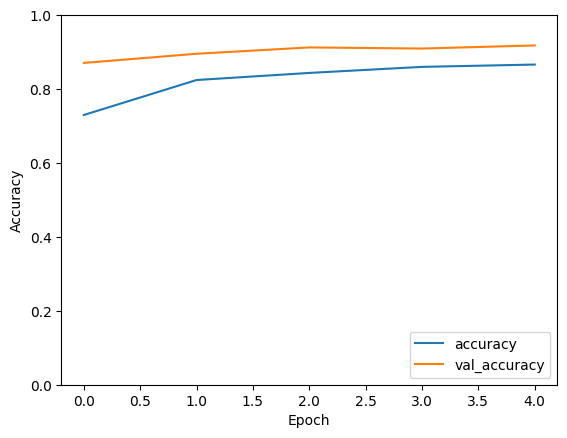

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [21]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

679/679 ━━━━━━━━━━━━━━━━━━━━ 60s 88ms/step - accuracy: 0.9159 - loss: 0.2612
Test Loss: 0.26170602440834045
Test Accuracy: 0.9139091372489929


In [24]:
model.save('my_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


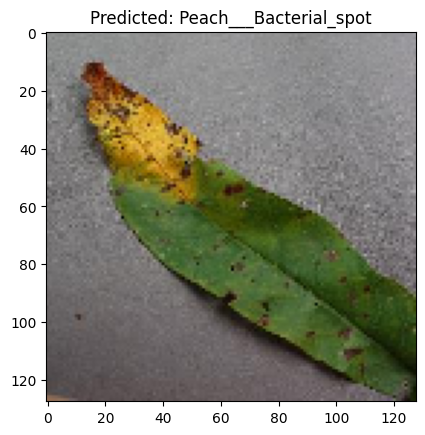

Predicted class: Peach___Bacterial_spot


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    class_labels = list(train_generator.class_indices.keys())

    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.show()

    print(f"Predicted class: {class_labels[predicted_class]}")

image_path = "/content/plant-village-dataset/plantvillage dataset/color/Peach___Bacterial_spot/0090cfcf-caf7-424d-b19c-533e09c6d24c___Rutg._Bact.S 2388.JPG"
predict_image(image_path)

In [25]:
!pip install Flask
!pip install pyngrok

In [28]:
!ngrok authtoken [Your Token]

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from flask import Flask, request, render_template_string
import matplotlib.pyplot as plt
import tensorflow as tf
from pyngrok import ngrok
import os
import io
from PIL import Image

IMAGE_SIZE = (128, 128)


app = Flask(__name__)

def predict_image(img):
    img = img.resize(IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]

    class_labels = list(train_generator.class_indices.keys())

    return class_labels[predicted_class]

HTML_TEMPLATE = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Leaf Disease Prediction</title>
    <link href="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/css/bootstrap.min.css" rel="stylesheet">
    <style>
        body {
            color: #343a40;
            font-family: 'Arial', sans-serif;
        }
        .container {
            margin-top: 50px;
        }
        h1 {
            color: #007bff;
            font-weight: bold;
            margin-bottom: 30px;
        }
        .card {
            padding: 20px;
            border-radius: 15px;
            box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
        }
        .btn-primary {
            background-color: #007bff;
            border: none;
        }
        .btn-primary:hover {
            background-color: #0056b3;
        }
        .result {
            margin-top: 20px;
            padding: 20px;
            background-color: #d4edda;
            color: #155724;
            border-radius: 10px;
        }
    </style>
</head>
<body>
    <div class="container">
        <div class="card">
            <h1 class="text-center">Leaf Disease Prediction</h1>
            <form action="/predict" method="post" enctype="multipart/form-data">
                <div class="mb-3">
                    <label for="file" class="form-label">Upload an image of the leaf:</label>
                    <input class="form-control" type="file" name="file" id="file" required>
                </div>
                <button type="submit" class="btn btn-primary w-100">Predict</button>
            </form>

            {% if prediction %}
                <div class="result">
                    <h3>Prediction Result: {{ prediction }}</h3>
                </div>
            {% endif %}
        </div>
    </div>

    <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.3.0-alpha1/dist/js/bootstrap.bundle.min.js"></script>
</body>
</html>
'''

@app.route('/')
def index():
    return render_template_string(HTML_TEMPLATE)

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return "No file part"

    file = request.files['file']

    if file.filename == '':
        return "No selected file"

    if file:
        img = Image.open(io.BytesIO(file.read()))
        prediction = predict_image(img)

        return render_template_string(HTML_TEMPLATE, prediction=prediction)

if __name__ == "__main__":
    port = 5000
    public_url = ngrok.connect(port)
    print(f" * ngrok URL: {public_url}")
    app.run(port=port)


 * ngrok URL: NgrokTunnel: "https://c484-34-125-10-144.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [14/Sep/2024 18:12:12] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [14/Sep/2024 18:12:13] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


INFO:werkzeug:127.0.0.1 - - [14/Sep/2024 18:12:19] "POST /predict HTTP/1.1" 200 -
